<a href="https://colab.research.google.com/github/devan1510/devan1510/blob/main/regression_breast_cancer(artificial_neural_network)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [ ]:
data= load_breast_cancer()
df= pd.DataFrame(data= data.data,columns= data.feature_names)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df["label"]= df["shape"]

In [ ]:
df.shape

(569, 31)

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
# label interpretation: 0= benign,1= malignant
df.label.value_counts()

,count
label,
1,357
0,212


In [ ]:
# determine feature and labels
X= df.drop(columns= ["label","shape"],axis= 1)
y= df.label

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
# import tensorflow
import tensorflow as tf
from tensorflow import keras

In [ ]:
# building a classification neural network
model= tf.keras.Sequential([
    keras.layers.Flatten(input_shape= (30,)),
    keras.layers.Dense(20,activation= "relu"),
    keras.layers.Dense(2,activation= "sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the model
model.compile(optimizer= "adam",
              loss= "sparse_categorical_crossentropy",
              metrics= ["accuracy"])

In [ ]:
# training the model
history= model.fit(X_train,y_train,validation_split= 0.1,epochs= 3)

Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9087 - loss: 0.3071 - val_accuracy: 0.9130 - val_loss: 0.2461
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9057 - loss: 0.2727 - val_accuracy: 0.9565 - val_loss: 0.2161
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8991 - loss: 0.2450 - val_accuracy: 0.9565 - val_loss: 0.1931


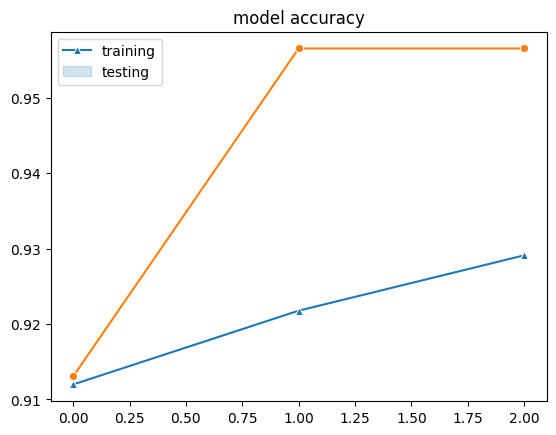

In [ ]:
sns.lineplot(history.history["accuracy"],marker= "^")
sns.lineplot(history.history["val_accuracy"],marker= "o")

plt.title("model accuracy")
plt.legend(["training","testing"])

Text(0.5, 1.0, 'model loss')

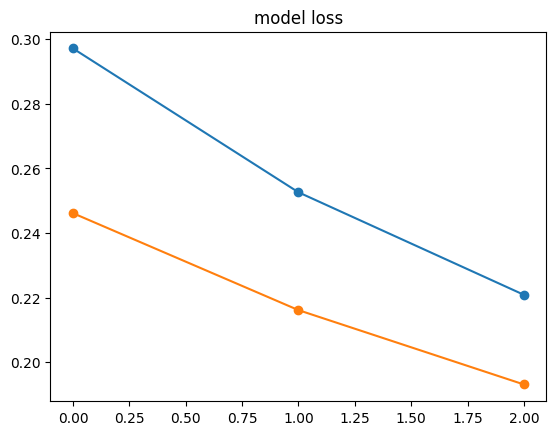

In [ ]:
plt.plot(history.history['loss'],marker= "o")
plt.plot(history.history['val_loss'],marker= "o")

plt.title('model loss')

In [ ]:
loss,accuracy= model.evaluate(X_test,y_test)
accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8993 - loss: 0.2404 


0.9122806787490845

In [ ]:
predictions= model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
predictions

array([[0.6145126 , 0.586556  ],
       [0.46460202, 0.6714534 ],
       [0.24225144, 0.9558588 ],
       [0.988987  , 0.02986124],
       [0.49430576, 0.57241607],
       [0.9563401 , 0.24834472],
       [0.57553816, 0.654607  ],
       [0.26366353, 0.92740554],
       [0.44883332, 0.90620536],
       [0.2438807 , 0.83799464],
       [0.50270617, 0.7725161 ],
       [0.31133246, 0.88181794],
       [0.40348867, 0.51453125],
       [0.47107288, 0.7626206 ],
       [0.49091986, 0.9077159 ],
       [0.4522555 , 0.24089985],
       [0.26615644, 0.93028975],
       [0.28817356, 0.82535374],
       [0.33517683, 0.9296396 ],
       [0.9373955 , 0.37969357],
       [0.85731465, 0.8395285 ],
       [0.21969365, 0.8870156 ],
       [0.28090495, 0.9364146 ],
       [0.18179995, 0.86042386],
       [0.23728098, 0.6660093 ],
       [0.71365064, 0.36531165],
       [0.33618742, 0.6604077 ],
       [0.31057024, 0.6213443 ],
       [0.43599987, 0.43896174],
       [0.6201613 , 0.3346756 ],
       [0.

In [ ]:
predictions_labels= [np.argmax(i) for i in predictions]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_labels))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        45
           1       0.90      0.96      0.93        69

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



In [ ]:
zero_labels= [label for label in predictions_labels if label == "0"]

In [ ]:
len(zero_labels)

0

In [ ]:
predictions_labels

[0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0]